In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
width = 224
height = 224
batch = 32
data_directory = "./dataset"

In [4]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split=0.3,
                                                                    subset = "training",
                                                                    seed = 50,
                                                                    image_size=(height,width),
                                                                    batch_size=batch
)

Found 3692 files belonging to 2 classes.
Using 2585 files for training.


In [5]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split=0.3,
                                                                    subset = "validation",
                                                                    seed = 50,
                                                                    image_size=(height,width),
                                                                    batch_size=batch
)

Found 3692 files belonging to 2 classes.
Using 1107 files for validation.


In [6]:
training_data.class_names

['with_mask', 'without_mask']

In [7]:
classes = training_data.class_names
classes

['with_mask', 'without_mask']

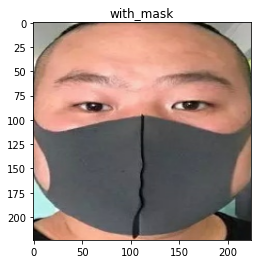

In [8]:
import matplotlib.pyplot as plt
for images, labels in training_data.take(1):
    plt.imshow(images[1].numpy().astype("uint8"))
    plt.title(classes[labels[1]])

In [9]:
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet")

In [10]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [11]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", patience= 5, verbose=1, restore_best_weights=True,
                  min_delta=0.1)

In [13]:
model.fit(training_data,
          validation_data=validation_data,
          epochs=15,
          callbacks=[es])

Epoch 1/15
81/81 [==============================] - 325s 4s/step - loss: 0.2414 - accuracy: 0.9609 - val_loss: 23.7676 - val_accuracy: 0.5221
Epoch 2/15
81/81 [==============================] - 326s 4s/step - loss: 0.0280 - accuracy: 0.9942 - val_loss: 10.4395 - val_accuracy: 0.6938
Epoch 3/15
81/81 [==============================] - 326s 4s/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 6.1651 - val_accuracy: 0.7624
Epoch 4/15
81/81 [==============================] - 330s 4s/step - loss: 0.0292 - accuracy: 0.9926 - val_loss: 4.0239 - val_accuracy: 0.7642
Epoch 5/15
81/81 [==============================] - 327s 4s/step - loss: 0.0344 - accuracy: 0.9911 - val_loss: 2.4747 - val_accuracy: 0.8546
Epoch 6/15
81/81 [==============================] - 330s 4s/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 3.1492 - val_accuracy: 0.8157
Epoch 7/15
81/81 [==============================] - 329s 4s/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 2.2967 - val_accuracy: 0.8537
Epoch 8/15


In [14]:
model.save("dl-model.save",save_format="h5")